## Import CSV

In [209]:
import pandas
def read_csv(filename,folder):
    folder=folder+"/"+filename+".csv"
    return pandas.read_csv(folder,encoding='ISO-8859-1')


In [210]:
folder="/nfs/Workspace/"
data=read_csv(filename="WEN",folder=folder)
data.columns = ( 'DATE','vfx','vix' ,'vbx', 'vmt','rwm','dog','psh', 'spx')
data = data.fillna(method='ffill')
data.head()

,DATE,vfx,vix,vbx,vmt,rwm,dog,psh,spx
0,2017-08-30,214.569443,11.22,9.983647,25.105610,45.747974,66.125107,32.038193,4761.720215
1,2017-08-31,215.804016,10.59,10.013153,25.402401,45.260769,65.929901,31.872953,4789.180176
2,2017-09-01,216.256409,10.13,9.994713,25.531948,45.056149,65.812805,31.795191,4798.990234
3,2017-09-05,214.626022,12.23,10.040814,25.362762,45.465393,66.593506,32.047920,4762.750000
4,2017-09-06,215.304565,11.63,10.022372,25.482641,45.358208,66.359299,31.931274,4777.689941


In [211]:
from matplotlib import pyplot
def plot_data(dataset,groups):
    i = 1
    pyplot.figure()
    values = dataset.values
    for group in groups:
    	pyplot.subplot(len(groups), 1, i)
    	pyplot.plot(values[:, group])
    	pyplot.title(dataset.columns[group], y=0.5, loc='right')
    	i += 1
    pyplot.show()

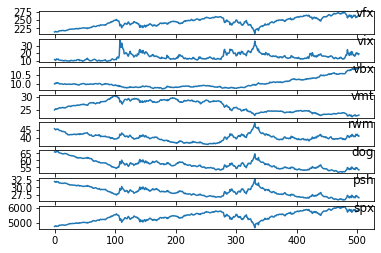

In [212]:
plot_data(data,groups=list(range(1,9)))

## Data Summary

In [213]:
data.describe()

,vfx,vix,vbx,vmt,rwm,dog,psh,spx
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,244.395805,15.333413,10.017343,26.430865,40.405756,57.019953,28.412942,5431.560540
std,13.908723,4.533763,0.286577,2.149230,2.195040,3.233095,1.507878,312.578747
min,210.128433,9.140000,9.683455,22.548750,36.076992,51.579994,25.667391,4672.660156
25%,235.074059,12.175000,9.805305,24.422805,39.192882,54.586658,27.226387,5222.270142
50%,244.253342,14.455000,9.943701,26.665625,40.392239,56.529932,28.301810,5430.175049
75%,255.819534,17.884999,10.096783,28.382936,41.760325,58.581785,29.345070,5685.679932
max,273.387878,37.320000,10.912119,30.474449,48.979759,66.593506,32.930397,6083.819824


## Independent and identically distributed (I.I.D.) Testing

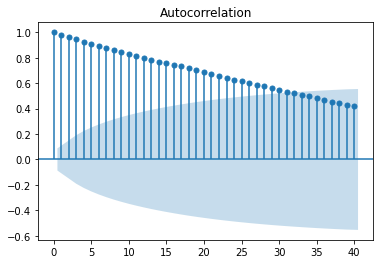

In [214]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.tsa.plot_acf(data['vfx'].values, lags=40)
plt.show()

## Histogram

<AxesSubplot:ylabel='Frequency'>

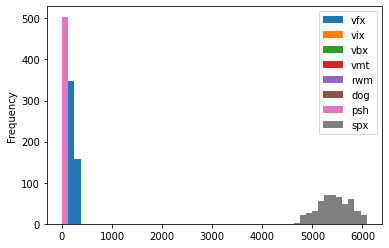

In [215]:
data.plot(kind="hist",bins=50)

## Normal Test 

In [216]:
from scipy import stats
print(stats.shapiro(data['vfx'].values))
print(stats.shapiro(data['vix'].values))
print(stats.shapiro(data['vbx'].values))
print(stats.shapiro(data['vmt'].values))
print(stats.shapiro(data['rwm'].values))
print(stats.shapiro(data['dog'].values))
print(stats.shapiro(data['psh'].values))
print(stats.shapiro(data['spx'].values))

ShapiroResult(statistic=0.9867095947265625, pvalue=0.00014817931514699012)
ShapiroResult(statistic=0.9145379066467285, pvalue=2.8941739379140154e-16)
ShapiroResult(statistic=0.8311961889266968, pvalue=1.1175922448543255e-22)
ShapiroResult(statistic=0.920864462852478, pvalue=1.3000096503034287e-15)
ShapiroResult(statistic=0.9752805829048157, pvalue=1.6048961981596221e-07)
ShapiroResult(statistic=0.943689227104187, pvalue=6.682389017131918e-13)
ShapiroResult(statistic=0.97395259141922, pvalue=8.181211796909338e-08)
ShapiroResult(statistic=0.9866713285446167, pvalue=0.0001442709326511249)


## *** LSTM ***

In [217]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
def Standard_MinMax(data):
    sc = MinMaxScaler(feature_range = (0, 1))
    
    return sc.fit_transform(data.reshape(-1,1))

In [218]:
#folder="/Users/wenyongjing/Downloads/第二章"
#data=read_csv(filename="WEN",folder=folder)
#data.columns = ( 'DATE','vfx','vix' ,'vbx', 'vmt','rwm','dog','psh', 'spx')
del data['DATE']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data)
data.head()

,vfx,vix,vbx,vmt,rwm,dog,psh,spx
0,214.569443,11.22,9.983647,25.105610,45.747974,66.125107,32.038193,4761.720215
1,215.804016,10.59,10.013153,25.402401,45.260769,65.929901,31.872953,4789.180176
2,216.256409,10.13,9.994713,25.531948,45.056149,65.812805,31.795191,4798.990234
3,214.626022,12.23,10.040814,25.362762,45.465393,66.593506,32.047920,4762.750000
4,215.304565,11.63,10.022372,25.482641,45.358208,66.359299,31.931274,4777.689941


In [219]:
data.shape

(504, 8)

## Series to Supervised

In [220]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pandas.DataFrame(data)
	cols, names = list(), list()
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pandas.concat(cols, axis=1)
	agg.columns = names
    
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [221]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.070203,0.073811,0.244324,0.322604,0.749528,0.968801,0.877158,0.063111,0.089719,0.051455,0.268338,0.360050,0.711768,0.955799,0.854407,0.082570
2,0.089719,0.051455,0.268338,0.360050,0.711768,0.955799,0.854407,0.082570,0.096871,0.035131,0.253330,0.376396,0.695909,0.948000,0.843700,0.089522
3,0.096871,0.035131,0.253330,0.376396,0.695909,0.948000,0.843700,0.089522,0.071098,0.109652,0.290852,0.355049,0.727627,1.000000,0.878497,0.063841
4,0.071098,0.109652,0.290852,0.355049,0.727627,1.000000,0.878497,0.063841,0.081824,0.088361,0.275842,0.370174,0.719320,0.984400,0.862437,0.074428
5,0.081824,0.088361,0.275842,0.370174,0.719320,0.984400,0.862437,0.074428,0.081824,0.085522,0.298355,0.387373,0.730648,0.992200,0.863776,0.074598


In [222]:
pred = {'vfx': 8}
reframed = pandas.concat([reframed.iloc[:,0:8],reframed.iloc[:,pred['vfx']]],axis=1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.070203,0.073811,0.244324,0.322604,0.749528,0.968801,0.877158,0.063111,0.089719
2,0.089719,0.051455,0.268338,0.360050,0.711768,0.955799,0.854407,0.082570,0.096871
3,0.096871,0.035131,0.253330,0.376396,0.695909,0.948000,0.843700,0.089522,0.071098
4,0.071098,0.109652,0.290852,0.355049,0.727627,1.000000,0.878497,0.063841,0.081824
5,0.081824,0.088361,0.275842,0.370174,0.719320,0.984400,0.862437,0.074428,0.081824


In [223]:
reframed.shape

(503, 9)

## Data Split

In [224]:
train = reframed.values[:350,:]
test = reframed.values[350:503,:]
train_X, train_y = train[:, :-1], train[:, -1]
test_X , test_y  = test[:, :-1], test[:, -1]
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((350, 8), (350,), (153, 8), (153,))

## LSTM

In [225]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X  = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
train_X.shape, train_y.shape, test_X.shape, test_y.shape

import keras
from keras import layers
from keras.layers import Dropout

model = keras.models.Sequential()
model.add(layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(layers.Dense(1))
#model.add(Dropout(0.5))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 50)                11800     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 11,851
Trainable params: 11,851
Non-trainable params: 0
_________________________________________________________________


## Training

In [226]:
history = model.fit(train_X, train_y, epochs=100, 
                    batch_size=72, validation_data=(test_X, test_y), 
                    verbose=1, shuffle=False)

Epoch 1/100
5/5 [==============================] - 0s 79ms/step - loss: 0.2914 - val_loss: 0.6091
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 0.2394 - val_loss: 0.5347
Epoch 3/100
5/5 [==============================] - 0s 17ms/step - loss: 0.1952 - val_loss: 0.4676
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1579 - val_loss: 0.4073
Epoch 5/100
5/5 [==============================] - 0s 16ms/step - loss: 0.1267 - val_loss: 0.3530
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 0.1009 - val_loss: 0.3043
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0801 - val_loss: 0.2610
Epoch 8/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0639 - val_loss: 0.2231
Epoch 9/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0519 - val_loss: 0.1909
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0434 - val_loss: 0.1642
Epoch 11/100
5/5 [====

## Plot Loss Curve

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'real']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


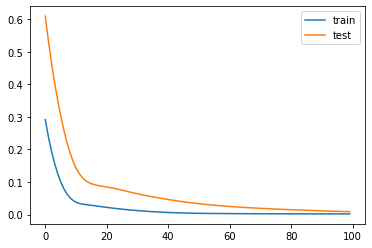

In [227]:
%pylab inline
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## Model Predict

In [228]:
folder="/nfs/Workspace/"
pred_data=read_csv(filename="PRED",folder=folder)
pred_data.columns = ( 'Date','vfx','vix' ,'vbx', 'vmt','rwm','dog','psh', 'spx')
#pred_data.isnull().sum()
pred_data = pred_data.fillna(method='ffill')
pred_data.head()


,Date,vfx,vix,vbx,vmt,rwm,dog,psh,spx
0,2019-09-27,268.591461,5978.109863,23.038769,40.458401,52.470287,26.140480,141.059998,93.279999
1,2019-09-30,269.957397,6008.589844,23.182716,40.438496,52.261082,26.011070,138.869995,90.720001
2,2019-10-01,266.665375,5935.200195,23.015104,41.204865,52.948467,26.339569,139.630005,89.519997
3,2019-10-02,261.889435,5828.930176,22.696642,41.543262,53.954639,26.807430,141.259995,87.839996
4,2019-10-03,264.041565,5876.859863,22.826788,41.384018,53.665741,26.598385,141.899994,87.440002


In [229]:
del pred_data['Date']
scaler = MinMaxScaler(feature_range=(0, 1))
pred_scaled = scaler.fit_transform(pred_data)
pred_data.head()

,vfx,vix,vbx,vmt,rwm,dog,psh,spx
0,268.591461,5978.109863,23.038769,40.458401,52.470287,26.140480,141.059998,93.279999
1,269.957397,6008.589844,23.182716,40.438496,52.261082,26.011070,138.869995,90.720001
2,266.665375,5935.200195,23.015104,41.204865,52.948467,26.339569,139.630005,89.519997
3,261.889435,5828.930176,22.696642,41.543262,53.954639,26.807430,141.259995,87.839996
4,264.041565,5876.859863,22.826788,41.384018,53.665741,26.598385,141.899994,87.440002


In [230]:
pred_reframed = series_to_supervised(pred_scaled, 1, 1)
pred_reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t)
1,0.509917,0.506829,0.545241,0.334866,0.369087,0.520731,0.071203,0.862443,0.520807,0.517719,0.570215,0.334036,0.361712,0.511007,0.032700,0.833484
2,0.520807,0.517719,0.570215,0.334036,0.361712,0.511007,0.032700,0.833484,0.494561,0.491499,0.541135,0.366002,0.385943,0.535689,0.046062,0.819909
3,0.494561,0.491499,0.541135,0.366002,0.385943,0.535689,0.046062,0.819909,0.456484,0.453531,0.485885,0.380116,0.421411,0.570843,0.074719,0.800905
4,0.456484,0.453531,0.485885,0.380116,0.421411,0.570843,0.074719,0.800905,0.473642,0.470655,0.508464,0.373474,0.411227,0.555136,0.085970,0.796380
5,0.473642,0.470655,0.508464,0.373474,0.411227,0.555136,0.085970,0.796380,0.503571,0.500513,0.549175,0.358114,0.385241,0.527462,0.085970,0.806335


In [231]:
pred = {'vfx': 8}
pred_reframed = pandas.concat([pred_reframed.iloc[:,0:8],pred_reframed.iloc[:,pred['vfx']]],axis=1)
pred_reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var1(t)
1,0.509917,0.506829,0.545241,0.334866,0.369087,0.520731,0.071203,0.862443,0.520807
2,0.520807,0.517719,0.570215,0.334036,0.361712,0.511007,0.032700,0.833484,0.494561
3,0.494561,0.491499,0.541135,0.366002,0.385943,0.535689,0.046062,0.819909,0.456484
4,0.456484,0.453531,0.485885,0.380116,0.421411,0.570843,0.074719,0.800905,0.473642
5,0.473642,0.470655,0.508464,0.373474,0.411227,0.555136,0.085970,0.796380,0.503571


In [232]:
pred_test = pred_reframed.values[:,:]
pred_test_X , pred_test_y  = pred_test[:, :-1], pred_test[:, -1]
pred_test_X.shape, pred_test_y.shape

((254, 8), (254,))

In [233]:
pred_test_X  = pred_test_X.reshape((pred_test_X.shape[0], 1, pred_test_X.shape[1]))
pred_test_X.shape, pred_test_y.shape

pred_yhat = model.predict(pred_test_X)
pred_test_X = pred_test_X.reshape((pred_test_X.shape[0], pred_test_X.shape[2]))
pred_yhat.shape, pred_test_X.shape

((254, 1), (254, 8))

## Invert scaling for forecast

In [234]:
pred = {'VFINX': 0}
pred_inv_yhat = concatenate((pred_yhat, numpy.delete(pred_test_X, pred['VFINX'], axis=1)), axis=1)
pred_inv_yhat = scaler.inverse_transform(pred_inv_yhat)
pred_inv_yhat = pred_inv_yhat[:,0]
pred_inv_yhat.shape,pred_inv_yhat

((254,),
 array([291.06406536, 291.59172171, 289.030131  , 284.41370991,
        285.41037168, 288.30938643, 287.95872949, 284.64126348,
        286.55032261, 288.65341197, 291.81025149, 290.55535375,
        292.01482318, 291.40825538, 291.99818112, 291.11846231,
        292.13220724, 291.96580911, 293.40681229, 294.11507157,
        295.10764386, 295.77604744, 295.47264019, 295.59947418,
        293.75264707, 296.67746224, 297.94797032, 299.03925108,
        298.50751272, 300.23117666, 301.31628207, 300.98070466,
        301.02169675, 301.4263843 , 301.11354953, 303.41414556,
        302.94028058, 301.43386052, 301.87502452, 303.01801827,
        303.11553055, 304.54554369, 305.2096335 , 306.0148892 ,
        302.78281653, 301.11435696, 299.73535404, 302.59545509,
        302.93592195, 305.5678788 , 304.96626773, 304.81282588,
        304.80628419, 306.63436095, 307.35787172, 309.16369179,
        309.35018599, 309.3992823 , 310.04324613, 310.48456714,
        310.87078096, 310.65891

## Invert scaling for actual

In [235]:
real = pred_test_y.reshape((len(pred_test_y), 1))
inv_y = concatenate((real, numpy.delete(pred_test_X, pred['VFINX'], axis=1)), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y.shape

(254,)

## RMSE

In [236]:
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(inv_y, pred_inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 24.995


In [237]:
from RegscorePy import *
aic.aic(inv_y, pred_inv_yhat, 12251)

26137.08938432972

In [238]:
#inv_y = np.cumprod(inv_y+1)
#inv_yhat = np.cumprod(inv_yhat+1)
inv_y,pred_inv_yhat

(array([269.95739746, 266.66537476, 261.88943481, 264.04156494,
        267.79547119, 266.59655762, 262.44955444, 264.9161377 ,
        266.62606812, 269.56430054, 269.19088745, 271.87365723,
        271.34295654, 272.10946655, 271.04821777, 272.91531372,
        271.95227051, 272.73846436, 273.25927734, 274.37954712,
        275.90274048, 275.81433105, 276.60043335, 275.7749939 ,
        278.46755981, 279.49942017, 279.1652832 , 279.38146973,
        280.27572632, 281.04223633, 280.48214722, 280.93414307,
        281.15036011, 281.45498657, 283.66604614, 283.81344604,
        283.65625   , 282.64407349, 282.22149658, 282.84057617,
        284.9927063 , 285.62161255, 286.85003662, 285.75924683,
        283.30245972, 281.42550659, 283.2336731 , 283.73486328,
        286.33901978, 285.45458984, 285.15975952, 285.98519897,
        288.48129272, 288.55004883, 290.61373901, 290.7119751 ,
        290.61373901, 291.92071533, 293.38677979, 293.63360596,
        293.60397339, 295.13421631, 295.

## Predict vs Real

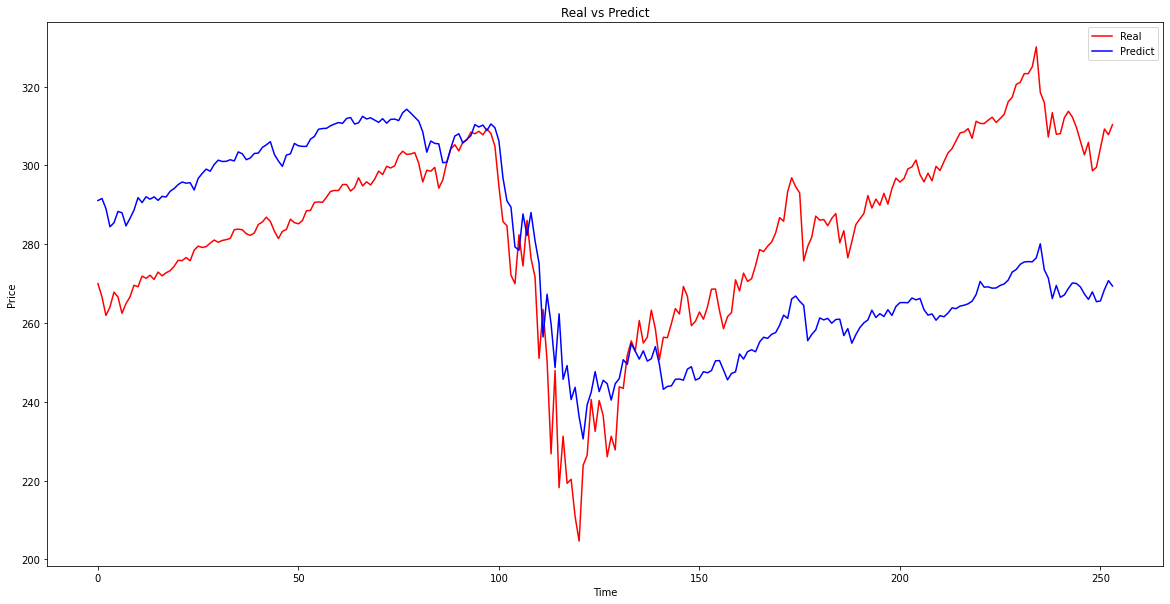

In [239]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(inv_y, color = 'red', label = 'Real')
plt.plot(pred_inv_yhat, color = 'blue', label = 'Predict')
plt.title('Real vs Predict')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [66]:
pred_data.head()


,vfx,vix,vbx,vmt,rwm,dog,psh,spx,gld,uso
0,268.591461,17.219999,10.814775,23.038769,40.458401,52.470287,26.140480,5978.109863,141.059998,93.279999
1,269.957397,16.240000,10.846966,23.182716,40.438496,52.261082,26.011070,6008.589844,138.869995,90.720001
2,266.665375,18.559999,10.866475,23.015104,41.204865,52.948467,26.339569,5935.200195,139.630005,89.519997
3,261.889435,20.559999,10.876229,22.696642,41.543262,53.954639,26.807430,5828.930176,141.259995,87.839996
4,264.041565,19.120001,10.915245,22.826788,41.384018,53.665741,26.598385,5876.859863,141.899994,87.440002


## CNN Data Split (same with LSTM)

In [ ]:
train = reframed.values[:400,:]
test = reframed.values[400:504,:]
train_X, train_y = train[:, :-1], train[:, -1]
test_X , test_y  = test[:, :-1], test[:, -1]
train_X.shape, train_y.shape, test_X.shape, test_y.shape

## CNN Data Split

In [ ]:
from keras.layers import Activation, Dense
model = keras.Sequential()
model.add(Dense(5, activation='relu', input_shape=(8,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1,  activation='sigmoid'))
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae','mse'])
model.summary()

## Training

In [ ]:
history = model.fit(train_X, train_y, epochs=200, 
                    batch_size=32, validation_data=(test_X, test_y), 
                    verbose=1, shuffle=False)

## Plot Loss Curve

In [ ]:
%pylab inline
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## Model Predict

In [ ]:
yhat = model.predict(pred_test_X)
yhat.shape, test_X.shape

In [ ]:
pred = {'vfx': 0}
inv_yhat = concatenate((yhat, numpy.delete(test_X, pred['vfx'], axis=1)), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
inv_yhat.shape

In [ ]:
real = test_y.reshape((len(test_y), 1))
inv_y = concatenate((real, numpy.delete(test_X, pred['vfx'], axis=1)), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
inv_y.shape

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
#inv_y = np.cumprod(inv_y+1)
#inv_yhat = np.cumprod(inv_yhat+1)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(inv_y, color = 'red', label = 'Real')
plt.plot(inv_yhat, color = 'blue', label = 'Predict')
plt.title('Real vs Predict')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## *** SVM Classification ***

In [ ]:
folder="C:/Users/user/Desktop/NCCU_DB/DataBase"
data=read_csv(filename="FEAT_DATA",folder=folder)
data.head()

## Data convert to Relative Change

In [ ]:
import numpy
y = data['VFINX']
#x = data[['VBMFX','VIX.chg','VIX.ret','SPX_SMA','VFINX_SKW','VBMFX_SKW','VIX_SKW']]
x = data[['VIX.ret','SPX_SMA']]
x.head()

## Y convert to Category

In [ ]:
#y = (y-y.mean())/y.std()
y = numpy.where(y>0, 1, 0)
#y = numpy.where(y>1, 1, numpy.where(y<-1, -1, 0))

In [ ]:
from sklearn.model_selection     import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.33, random_state = 42 )

## Standardize Function

In [ ]:
from sklearn.preprocessing       import StandardScaler
def Standard(data):
    sc = StandardScaler()
    # fit_transform will fixed mean & vol by data
    # transform reuse above mean & vol
    return sc.fit_transform(data)

In [ ]:
x = Standard(x)
x.shape

## SVM Classifier

In [ ]:
def plot_classifier(data,target,type,C=100,svc_kernel="rbf"):
    if type == 'SVC':
        from sklearn.svm import SVC
        clf = SVC(C=C,kernel=svc_kernel)
        clf.fit(data, target)
    if type == 'Logistic':
        from sklearn.linear_model import LogisticRegression
        clf = LogisticRegression()
        clf.fit(data, target)
    plot_estimator(estimator=clf, data=data ,target=target)
    
def plot_estimator(estimator, data, target):
    # *** estimator model must trained by two variables ***
    x_min, x_max = data[:, 0].min() - 0.02, data[:, 0].max() + 0.02
    y_min, y_max = data[:, 1].min() - 0.02, data[:, 1].max() + 0.02
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, 0.005), numpy.arange(y_min, y_max, 0.005))
    Z = estimator.predict(numpy.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.plot()
    plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    plt.scatter(data[:, 0], data[:, 1], c=target, cmap = plt.cm.brg)
    plt.xlabel('Index Return')
    plt.ylabel('Dividend Growth')
    plt.show()

## Plot Decision Boundary

In [ ]:
import matplotlib.pyplot as plt
plot_classifier(data=x,target=y,type="SVC",svc_kernel="linear",C=100)

In [ ]:
plot_classifier(data=x[:1000,:],target=y[:1000],type="SVC",svc_kernel="linear",C=100)

In [ ]:
plot_classifier(data=x[:50,:],target=y[:50],type="SVC",svc_kernel="rbf",C=1000)

In [ ]:
plot_classifier(data=x[:1500,:],target=y[:1500],type="SVC",svc_kernel="rbf",C=1000)